<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
file = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"
# Load the csv file into a dataframe
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [2]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

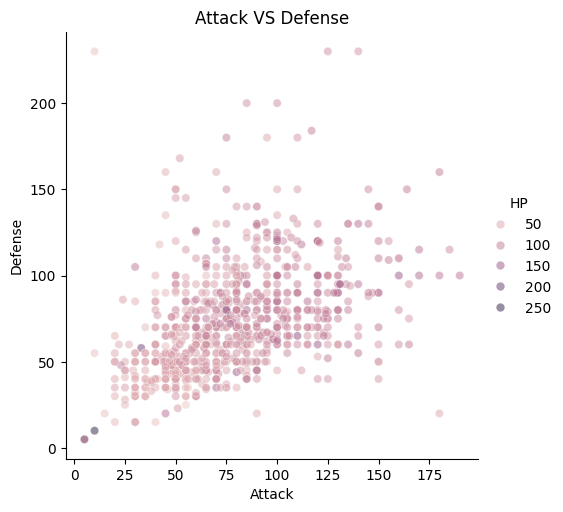

In [4]:
sns.relplot(data=df,
           x="Attack",
           y="Defense",
           hue='HP',
           alpha=0.5)
plt.title("Attack VS Defense");

From the plot, I observed that there is correlation between 2 variables. Most of pokemons are <150 in both. There are outliers

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

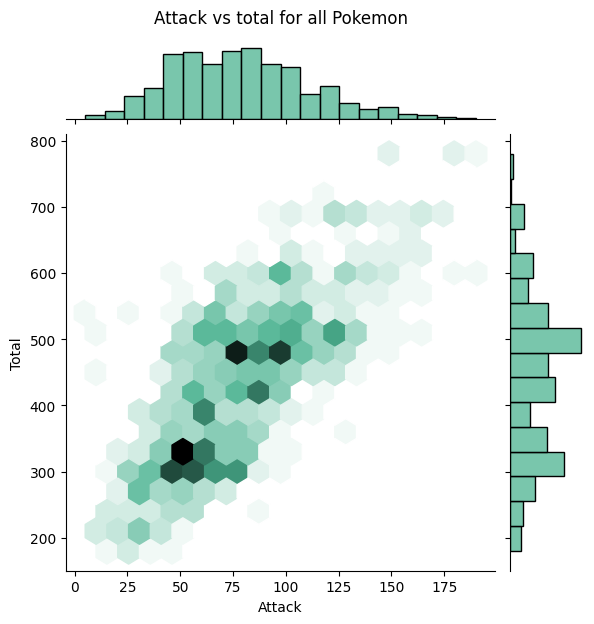

In [5]:
sns.jointplot(data=df,
           x="Attack",
           y="Total",
           kind="hex",
           color="#4CB391")

plt.title('Attack vs total for all Pokemon', loc='center', pad=80);

From the plot, I observed that is also shows distribution for both variables. And 2 clustering centers can be established.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

In [6]:
counts1 = df['Type 1'].dropna().value_counts()
counts2 = df['Type 2'].dropna().value_counts()

Text(0.5, 1.0, 'Type 1')

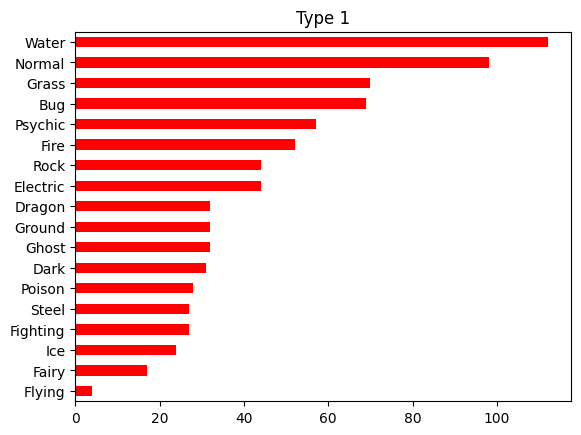

In [13]:
counts1.sort_values().plot(kind='barh', color='red')
plt.title('Type 1')

Text(0.5, 1.0, 'Type 2')

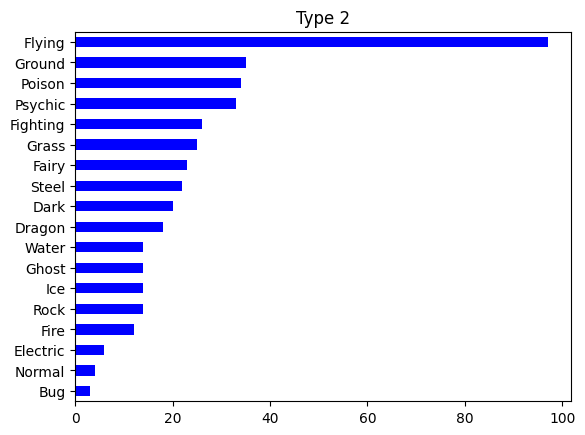

In [14]:
counts2.sort_values().plot(kind='barh', color='blue')
plt.title('Type 2')

Most common:

  t1: water
  t2: flying

Least common:

  t1: flying
  t2: bug

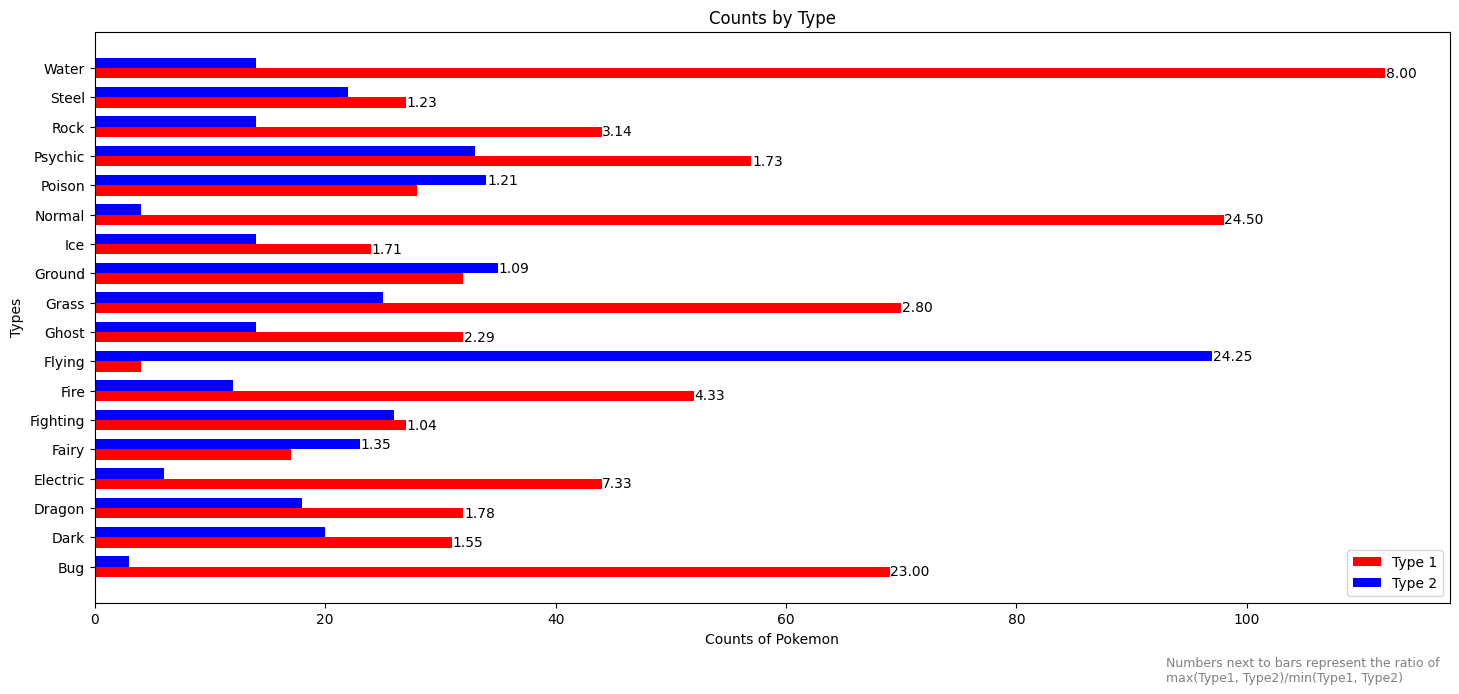

In [9]:
# e.c.?
import numpy as np

counts = pd.DataFrame({'Type 1' : counts1, 'Type 2' : counts2})
fig, ax = plt.subplots(figsize=(15,7))
pos = np.arange(len(counts))
w = 0.35

def abs_ratio(a, b):
    return max(a, b) / min(a, b)

counts['ratio'] = counts.apply(lambda row: abs_ratio(row['Type 1'], row['Type 2']), axis=1)

bars1 = plt.barh(pos - w/2, counts['Type 1'], w, align='center', label='Type 1', color='red')
bars2 = plt.barh(pos + w/2, counts['Type 2'], w, align='center', label='Type 2', color='blue')


# plt.barh(pos - w/2, counts['Type 1'], w, align='center', label='Type 1', color='red')
# plt.barh(pos + w/2, counts['Type 2'], w, align='center', label='Type 2', color='blue')

plt.ylabel('Types')
plt.xlabel('Counts of Pokemon')
plt.title('Counts by Type')
plt.yticks(pos, counts.index, rotation='horizontal')
plt.text(x=93, y=-4, s='Numbers next to bars represent the ratio of\nmax(Type1, Type2)/min(Type1, Type2)', ha='left', va='bottom', fontsize=9, color='gray')
plt.legend()
plt.tight_layout()

# below this line is not my code. but we did not cover such feature,
# and i thought it will be very informative and useful on this graph
for i, ratio in enumerate(counts['ratio']):

    if bars1[i].get_width() > bars2[i].get_width():
        higher_bar_width = bars1[i].get_width()
        y_position = bars1[i].get_y() + bars1[i].get_height() / 2
    else:
        higher_bar_width = bars2[i].get_width()
        y_position = bars2[i].get_y() + bars2[i].get_height() / 2

    ax.text(higher_bar_width + 0.05,
            y_position,
            f'{ratio:.2f}',
            va='center', fontsize=10)